Sample data:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      4961
           1       0.88      0.91      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



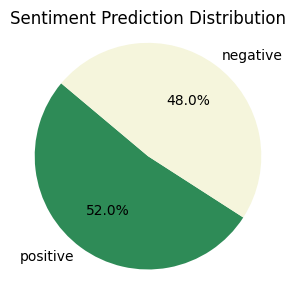

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/movie_review_dataset.csv')  # Change path if needed
print("Sample data:")
print(df.head())

# Rename columns if needed
df.columns = ['text', 'sentiment']

# Train-test split
x = df['text']
y = df['sentiment'].map({'positive': 1, 'negative': 0})  # Convert to numeric
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
x_train_tfidf = vectorizer.fit_transform(x_train)
x_test_tfidf = vectorizer.transform(x_test)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(x_train_tfidf, y_train)

# Predict
y_pred = model.predict(x_test_tfidf)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Visualization using a pie chart
label_counts = pd.Series(y_pred).map({1: 'positive', 0: 'negative'}).value_counts()
plt.figure(figsize=(3, 3))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', colors=['seagreen', 'beige'], startangle=140)
plt.title('Sentiment Prediction Distribution')
plt.axis('equal')  # Ensures pie is drawn as a circle
plt.tight_layout()
plt.show()
